# 观察gen_example中的midi

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# 列出gen_example文件夹中的所有文件
files = os.listdir('gen_example')
print(len(files))

22106


In [2]:
# 获取每个文件的音符密度，并绑定索引
raw_data = []
for i, file in enumerate(files):
    if file.endswith('.npy'):
        data = np.load(os.path.join('gen_example', file))
        count_1 = np.sum(data == 1)
        count_2 = np.sum(data == 2)
        raw_data.append([count_1, count_2])

In [3]:
def ednsity_calc(note_len, note_num):
    return note_num
    avg_len = note_len / note_num
    return (note_len + 10 * note_num) + 1000 / avg_len

id_density = []
for i, data in enumerate(raw_data):
    id_density.append([i, ednsity_calc(data[0], data[1])])

# 根据音符密度进行排序
id_density.sort(key=lambda x: x[1])

# 转换为numpy数组
id_density = np.array(id_density, dtype=int)
print(id_density.shape)

density = id_density[:, 1]
id = id_density[:, 0]

(22106, 2)


Density的中位数是: 62.0
Density的平均值是: 81.37207093096897


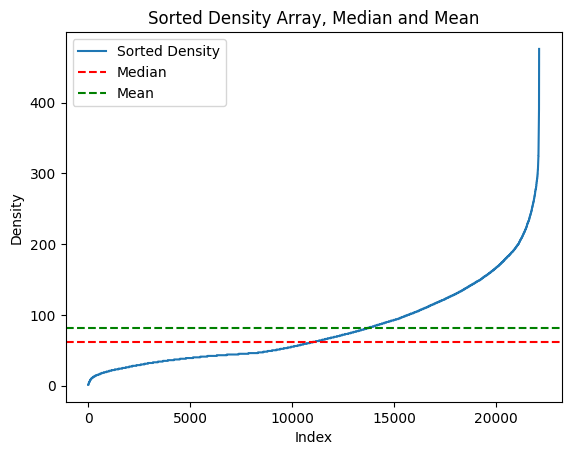

In [4]:
# 找到density的中位数
median_density = np.median(density)
print(f"Density的中位数是: {median_density}")

# 找到density的平均值
mean_density = np.mean(density)
print(f"Density的平均值是: {mean_density}")

# 绘制排序后的density数组
plt.plot(density, label='Sorted Density')
plt.axhline(y=median_density, color='r', linestyle='--', label='Median')
plt.axhline(y=mean_density, color='g', linestyle='--', label='Mean')
plt.xlabel('Index')
plt.ylabel('Density')
plt.title('Sorted Density Array, Median and Mean')
plt.legend()
plt.show()

中位数在density中的位置是: 11008


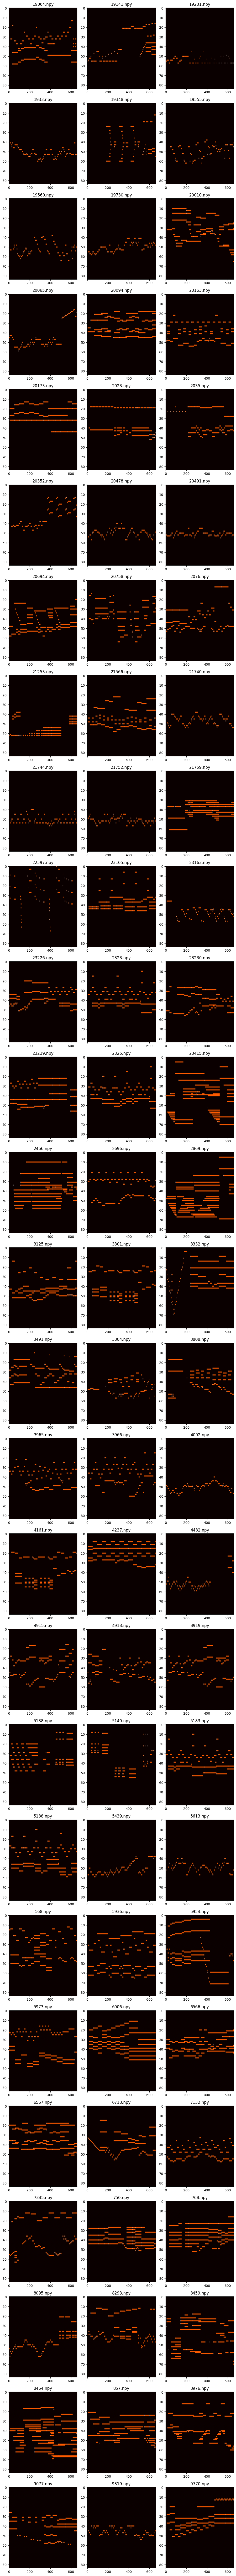

In [5]:
# 找到中位数在density中的位置i
median_index = np.where(density == int(median_density))[0][0]
print(f"中位数在density中的位置是: {median_index}")

# 找到id数组该位置对应的文件序号，然后读取内容
files_to_plot = [files[int(id[i])] for i in range(median_index - 81, median_index)]
data_to_plot = [np.load(os.path.join('gen_example', file)) for file in files_to_plot]

# 绘制成2*2的图
col_num = 3
row_num = math.ceil(len(files_to_plot) / col_num)
fig, axs = plt.subplots(row_num, col_num, figsize=(10, 4 * row_num))
for ax, data, file in zip(axs.flatten(), data_to_plot, files_to_plot):
    ax.imshow(data, aspect='auto', cmap='hot')
    ax.set_title(file)
plt.tight_layout()
plt.show()

In [13]:
toview = 5439
# 加载19141.npy文件的数据
data_19141 = np.load(os.path.join('gen_example', f'{toview}.npy'))

# 保存数据为图片
output_dir = 'example_view'
os.makedirs(output_dir, exist_ok=True)

plt.imsave(os.path.join(output_dir, f'{toview}.png'), data_19141, cmap='hot')